# Teamwork Phishing Project (CYBER 362)
### by Joseph Princiotta & Justin Lusk

## Phase 0

### Problem Scope

People are constantly targeted by different types phishing attacks. Phishing attacks are one of the most common types of attacks for both coporate and personal settings. The two main reasons that phishing attacks are so common is, they are one of the least technical attacks, and they are effective. People are usually the weakest point in a security framework. 

One type of phishing attack is phishing websites, where a attacker mimics a website in the hopes of the victim entering their credentials or other personally identifiable information. The amount of damage that could be caused after a successful phishing campaign comes down to the skill level of the attacker and what they are after. An lower teir attacker might install ransomeware or simply deface your website. A higher teired attacker could hide in the network and collect data for very long periods of time. 

15 billion spam emails are recieved everyday. Last year(2021) 83% of organizations reported experiencing phishing attacks. 42% of workers self-reported taken dangerous actions like, clicking a unknown link, downloading a unknown file, or revealing personal information. Office 365 reports that 25% of malicious emails make it to their targets inboxes. Unless your organization doesnt use the internet or email then it is at risk for becoming a victim of a phishing campaign.

We hope to build a machine learning model that will be able to proactively filter potential phishing websites from users on the network.


### How can machine learning help reduce phishing sites

We can attempt to solve this issue or atleast mitigate some of the risk through the use of machine learning. With enough of the right data we can train a AI to look at a website and evaluate wether or not it is legitimate. Most users are not familiar with the signs of fake or malicious website. Even users who recieve training on what to look for, and what to, and not to do, have off days and make mistakes. However, a AI running in the background could remove the need for this type of training and the burden of evaluating the legitimacy of a website from the users. One of the disadvantages of identification AI is false positives and false negatives. The AI could make a mistake and identify a legitimate website as a malicious one, or worse a malicious website as a legitimate website.

A machine learning model would be most effective as a "first line of defense" agains phishing sites. Filtering out suspected sites automatically based on the most common features. This would save a security analysist the time and effort of having to manually build filters and they could then focus on sites that are not flagged by the model, greatly reducing the amount of phishing websites. 



### Research questions

1) What are the most prevelant features of phishing websites (long url, several layers of subdomains, use of more then 1 domain, special characers in url)? 

2) What algorithm/staticsical tools & visualization would be best suited to filtering the malicious urls?

3) After creating a ML model to identify phishing websites, is the model effective? After running training datasets through the model what changes/modification can be made to make the model more effective (measure both type 1 and type 0 errors and adjust the model accordingly)? Building monitoring visualizations will help to analyize the effectiveness of the phishing filters. 

## Phase 1 Data Preprocessing

### Cleaning the Dataset

In [1]:
##### Import CSV data and set NA values

import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])


No data need to be encoded as binary data is already encoded properly. Categorical data was not present in the CSV files, so no dummy columns were needed. 

In [2]:
print(dfTrain.dtypes)

id                      int64
NumDots               float64
SubdomainLevel        float64
PathLevel             float64
UrlLength             float64
NumDash               float64
NumDashInHostname     float64
AtSymbol              float64
TildeSymbol           float64
NumUnderscore         float64
NumPercent            float64
NumQueryComponents    float64
NumAmpersand          float64
NumHash               float64
NumNumericChars       float64
NoHttps               float64
RandomString          float64
IpAddress             float64
DomainInSubdomains    float64
DomainInPaths         float64
HttpsInHostname       float64
HostnameLength        float64
PathLength            float64
QueryLength           float64
DoubleSlashInPath     float64
NumSensitiveWords     float64
EmbeddedBrandName     float64
PctExtResourceUrls    float64
ExtFavicon            float64
InsecureForms         float64
RelativeFormAction    float64
ExtFormAction         float64
AbnormalFormAction    float64
RightClick

#### Total missing/NA values of Training data

In [3]:
print(dfTrain.isnull().sum())
print(dfTrain.isnull().any(axis=0))# Show sum of columns with N/A
print(dfTrain.isnull().any(axis=1))# Show sum of rows with N/A
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
print(trainRowsWithNa)

id                    0
NumDots               1
SubdomainLevel        1
PathLevel             1
UrlLength             6
NumDash               2
NumDashInHostname     4
AtSymbol              3
TildeSymbol           3
NumUnderscore         2
NumPercent            3
NumQueryComponents    4
NumAmpersand          3
NumHash               5
NumNumericChars       4
NoHttps               2
RandomString          2
IpAddress             2
DomainInSubdomains    2
DomainInPaths         3
HttpsInHostname       2
HostnameLength        7
PathLength            6
QueryLength           6
DoubleSlashInPath     5
NumSensitiveWords     5
EmbeddedBrandName     5
PctExtResourceUrls    8
ExtFavicon            5
InsecureForms         5
RelativeFormAction    5
ExtFormAction         5
AbnormalFormAction    5
RightClickDisabled    5
PopUpWindow           5
IframeOrFrame         5
MissingTitle          5
ImagesOnlyInForm      5
CLASS_LABEL           0
dtype: int64
id                    False
NumDots                

#### Confirm no missing/NA values of Test data (NONE)

In [4]:
print(dfTest.isnull().sum())
print(dfTest.isnull().any(axis=0))
print(dfTest.isnull().any(axis=1))

id                    0
NumDots               0
SubdomainLevel        0
PathLevel             0
UrlLength             0
NumDash               0
NumDashInHostname     0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumQueryComponents    0
NumAmpersand          0
NumHash               0
NumNumericChars       0
NoHttps               0
RandomString          0
IpAddress             0
DomainInSubdomains    0
DomainInPaths         0
HttpsInHostname       0
HostnameLength        0
PathLength            0
QueryLength           0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
PctExtResourceUrls    0
ExtFavicon            0
InsecureForms         0
RelativeFormAction    0
ExtFormAction         0
AbnormalFormAction    0
RightClickDisabled    0
PopUpWindow           0
IframeOrFrame         0
MissingTitle          0
ImagesOnlyInForm      0
dtype: int64
id                    False
NumDots               False
SubdomainLevel     

### Identify rows with missing values and create threshold to drop rows

Identify rows with > 1 missing values for imputation

In [5]:
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
print(rowsToDrop.shape)
print(rowsToDrop) # Index of rows that were dropped because >1 N/A value

# Drop rows with > 1 N/A's
dfTrain.drop(rowsToDrop, inplace=True)
print(dfTrain.shape)

(10,)
Int64Index([6, 902, 979, 1759, 1820, 2775, 2776, 2777, 2778, 2779], dtype='int64')
(4990, 39)


### Data Imputation

### Data imputation method : KNN
KNN was chosen because it offers the benifits of finding rows similar to missing data, this method is best used with enough good data points to calculate KNN from. This data has 5000 cases, plenty for KNN imputation. 

In [6]:
imputer = KNNImputer(n_neighbors=10) # Choose imputer based on 10 nearest neighbors
# Create new dataframe
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
print(dfTrain2)
print(dfTrain2.shape)

          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        1.0      3.0             1.0        5.0       81.0      1.0   
1        2.0      2.0             0.0        5.0       78.0      1.0   
2        3.0      3.0             0.0        4.0       53.0      1.0   
3        4.0      3.0             1.0        6.0       68.0      0.0   
4        5.0      3.0             0.0        3.0       61.0      0.0   
...      ...      ...             ...        ...        ...      ...   
4985  4996.0      3.0             1.0        1.0       67.0      3.0   
4986  4997.0      1.0             0.0        2.0       36.0      1.0   
4987  4998.0      3.0             2.0        0.0       33.0      0.0   
4988  4999.0      3.0             1.0        2.0       47.0      0.0   
4989  5000.0      1.0             0.0        2.0       37.0      0.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                   1.0       0.0          0.0            1.0  ..

### Outlier Detection
#### Manual Visual Outlier Detection & Visualization

Plot of the most obvious outliers manually. 

<Figure size 640x480 with 0 Axes>

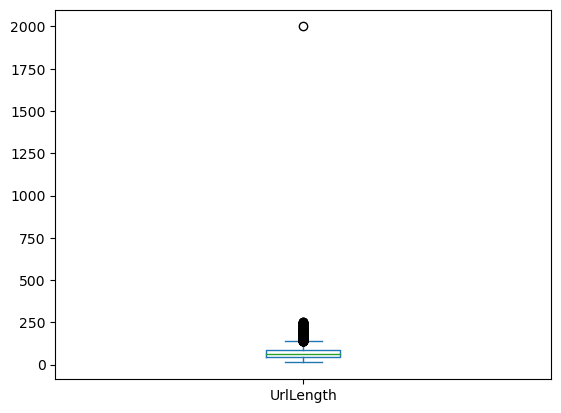

Int64Index([95], dtype='int64')
(4989, 39)


In [7]:
# Example of one heavy outlier for 'UrlLength'
plt.figure()
dfTrain2[['UrlLength']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'UrlLengh' > 500 because 1 data point > 1750 will skew data heavily
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
print(rows_to_drop)
# Drop rows where 'UrlLength' > 500
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

Plot after removing 'UslLength' > 500

<Figure size 640x480 with 0 Axes>

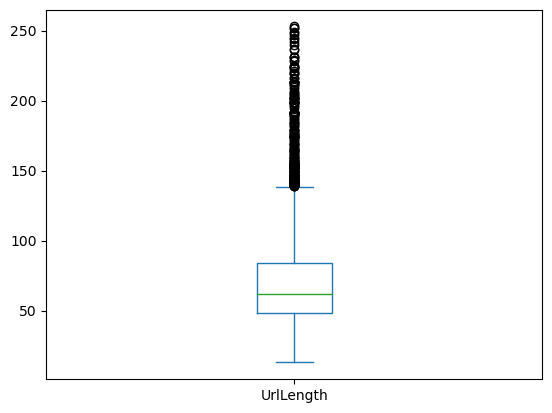

In [8]:
# Plog again after outlier removal
plt.figure()
dfTrain2[['UrlLength']].plot.box()
plt.show()

##### Manual removal of outliers for 'NumNumericChars'

<Figure size 640x480 with 0 Axes>

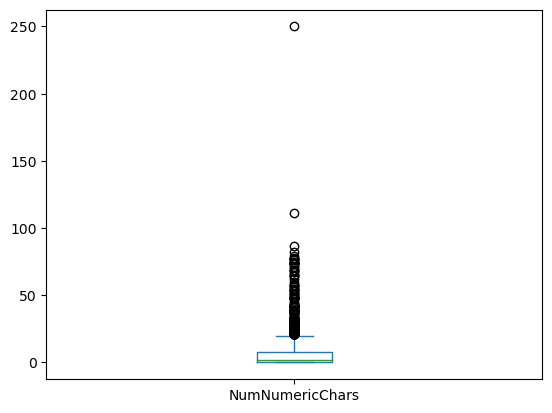

Int64Index([3132, 4854], dtype='int64')
(4987, 39)


In [9]:
# Example of one heavy outlier for 'NumNumericChars'
plt.figure()
dfTrain2[['NumNumericChars']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'NumNumericChars' > 100 because 2 data points will skew data
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
print(rows_to_drop)
# Drop rows where 'UrlLength' > 100
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

Plot after removal of 'NumNumericChars' > 100

<Figure size 640x480 with 0 Axes>

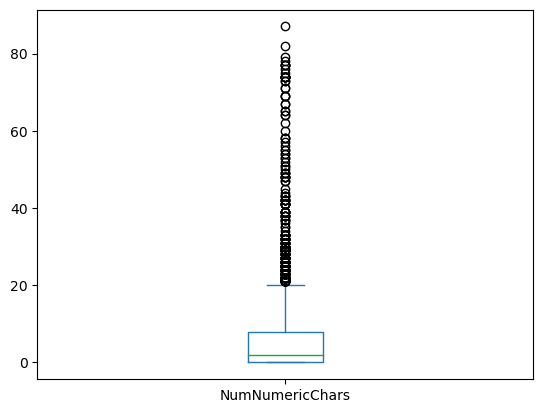

In [10]:
# Plog again after outlier removal
plt.figure()
dfTrain2[['NumNumericChars']].plot.box()
plt.show()

##### Manual removal of outliers for 'NumDash'

<Figure size 640x480 with 0 Axes>

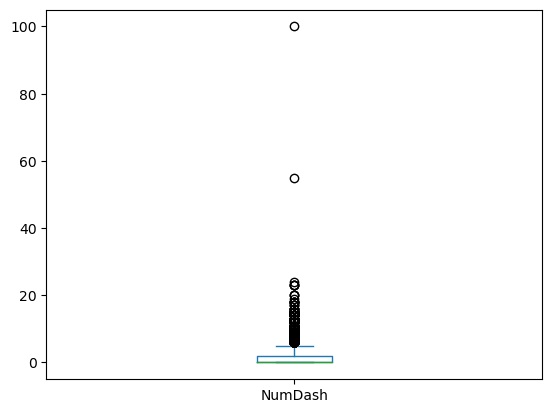

Int64Index([33, 256, 1271, 1329, 4272, 4331, 4392], dtype='int64')
(4980, 39)


In [11]:
# Example of one heavy outlier for 'NumDash'
plt.figure()
dfTrain2[['NumDash']].plot.box()
plt.show()

# Drop big outlier row
# Should drop row with 'NumDash' > 20 because a few data points will skew data
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
print(rows_to_drop)
# Drop rows where 'NumDash' > 20
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

Plot of 'NumDash' after removing outliers > 10

<Figure size 640x480 with 0 Axes>

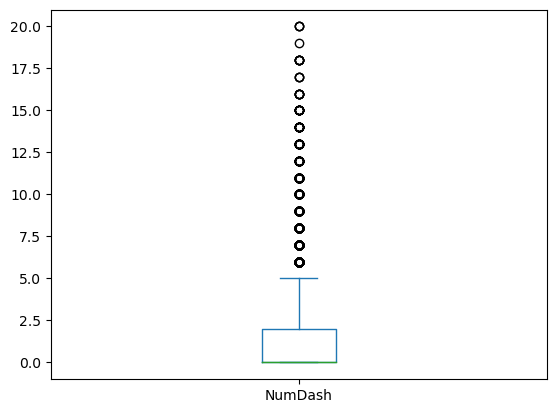

In [12]:
# Plot again after outlier removal
plt.figure()
dfTrain2[['NumDash']].plot.box()
plt.show()

#### Plotting each numerical column will show outlier for each feature. Can start by creating a dataframe to isolate numeric columns. Need to isolate numeric columns because there can be no outliers in binary data. 
#### Plots of Numerical Columns to show outliers for each column
 List of numerical columns: 'NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords'

Create a DF of all numerical Columns in dfTrain2 & Plot to see outliers for each 

<Figure size 640x480 with 0 Axes>

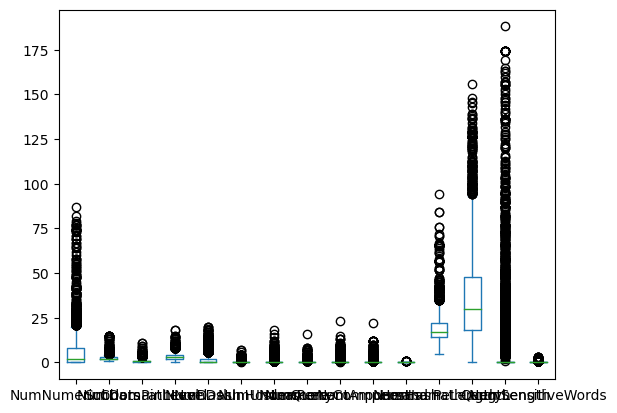

In [13]:
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
plt.figure()
dfTrain2Numerical.plot.box()
plt.show()

Can see that a few columns have a bunch of outliers, 'NumNumericChars', 'HostnameLength','PathLength','QueryLength'

#### Automatic Outlier Detection
##### This should be done because 15 columns is too many to use manual outlier detection. Automatic Outlier detection should only be performed on numerical columns, binany data can't have outliers

(4980, 39)
[-1.16234729 -1.11522228 -0.98567164 ... -1.24306869 -1.01490796
 -0.99478024]
-1.5
[1 1 1 ... 1 1 1]
Int64Index([   3,   28,   58,   99,  108,  117,  120,  122,  134,  167,
            ...
            4838, 4847, 4849, 4883, 4891, 4900, 4939, 4966, 4977, 4980],
           dtype='int64', length=387)
(4593, 39)


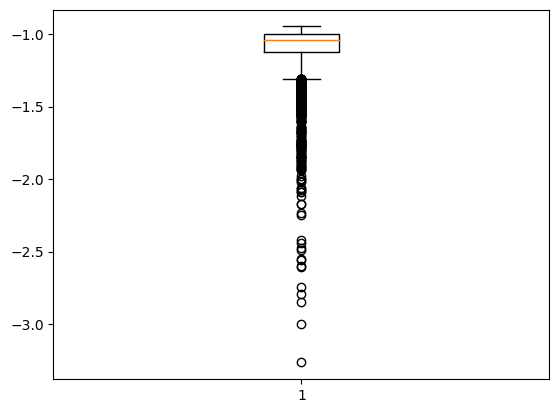

In [14]:
from sklearn.neighbors import LocalOutlierFactor
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
print(dfTrain2.shape)
# Find labels of outliers
outlier_label=clf.fit_predict(X)
print(clf.negative_outlier_factor_)
print(clf.offset_)
print(outlier_label)

plt.boxplot(clf.negative_outlier_factor_)

# Identify index of rows to drop
# Use threshold of -1.30, as -1.5 may leave too many outliers in

rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index

# Drop rows with negative_outlier_factor < -1.30
print(rows_to_drop) # Index of rows that will be dropped from dfTrain2
dfTrain2.drop(rows_to_drop,inplace=True)
print(dfTrain2.shape)

Plot of Numerical data after removing outliers

<Figure size 640x480 with 0 Axes>

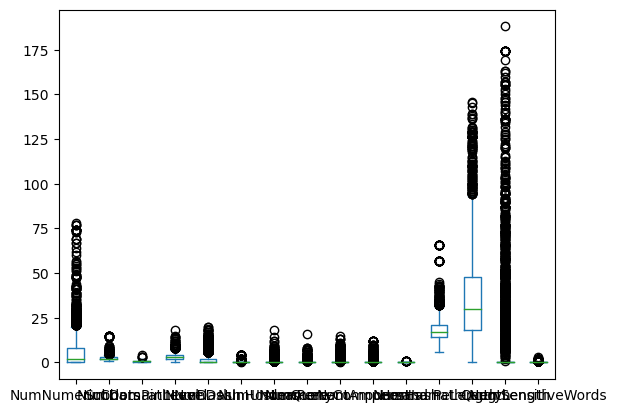

In [15]:
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
plt.figure()
dfTrain2Numerical.plot.box()
plt.show()

### Data Standardization
Data standardization should be done on numerical columns to get a mean of 0 with std = 1.

In [16]:
from sklearn.preprocessing import StandardScaler

dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

dfTrain2Numerical.is_copy = False

# Error is happening here when adding the new rows to the dfTrain2Numerical dataframe. Tried top solutions from stack overflow and nothing is working. Does not effect data.
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X

/var/folders/fy/qkf0np1x4kl85kmwqglb59wh0000gn/T/ipykernel_1245/2246432787.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
/var/folders/fy/qkf0np1x4kl85kmwqglb59wh0000gn/T/ipykernel_1245/2246432787.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

#### Plot Before Standardization

<AxesSubplot:>

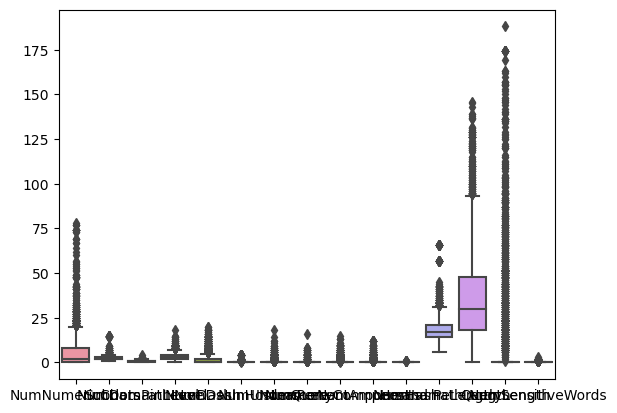

In [17]:
sns.boxplot(data=dfTrain2Numerical[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']])

#### Plots After Standardization

Standardization brought mean of all variable to 0 with a standard deviation of 1.

<AxesSubplot:>

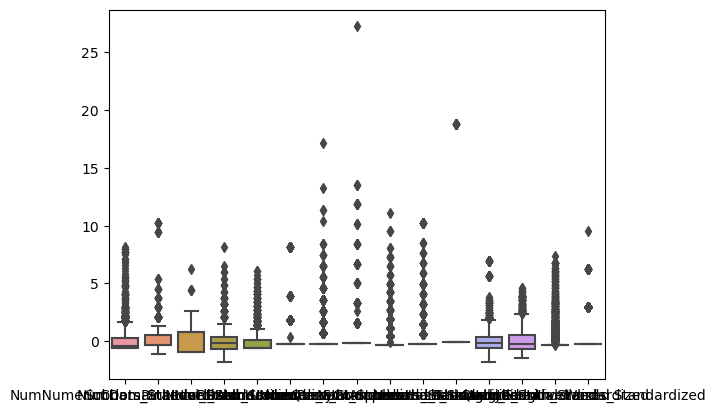

In [18]:
sns.boxplot(data=dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']])

### Team member contributions
Justin Lusk: Code for Data Standardization, imputation and automatic outlier sections.
Joseph Princiotta: Code & visualizations for manual outlier sections, creating notebook.